In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('portfolio_data.csv')

In [ ]:
df

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


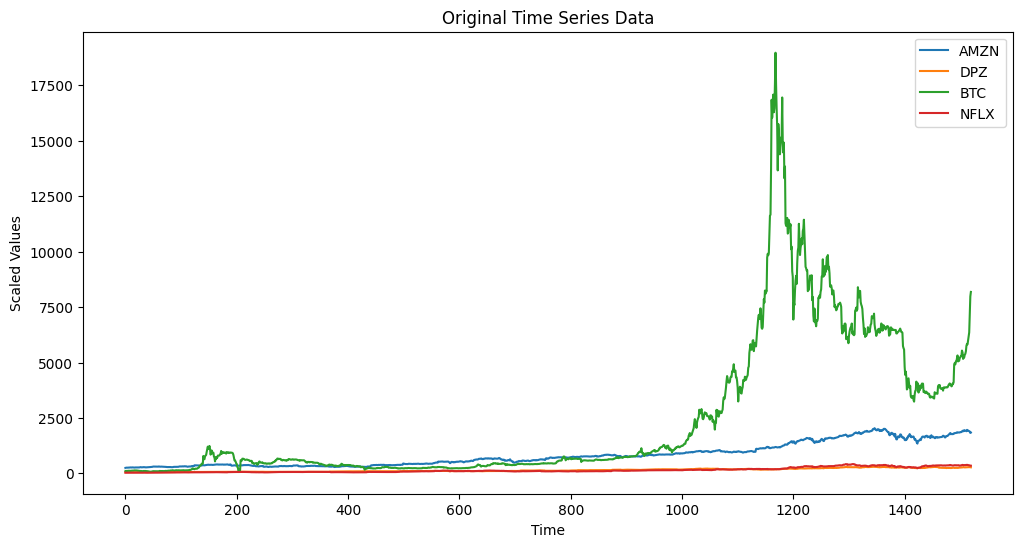

In [ ]:
df.plot(figsize=(12, 6))
plt.title("Original Time Series Data")
plt.xlabel("Time")
plt.ylabel("Scaled Values")
plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB

Missing Values:
Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

Original Data:
       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285

Preprocessed Data:
                AMZN       DPZ       BTC      NFLX
Date                                              
20

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
<ipython-input-22-5ae7b2249808>:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True)
<ipython-input-22-5ae7b2249808>:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='bfill', inplace=True)


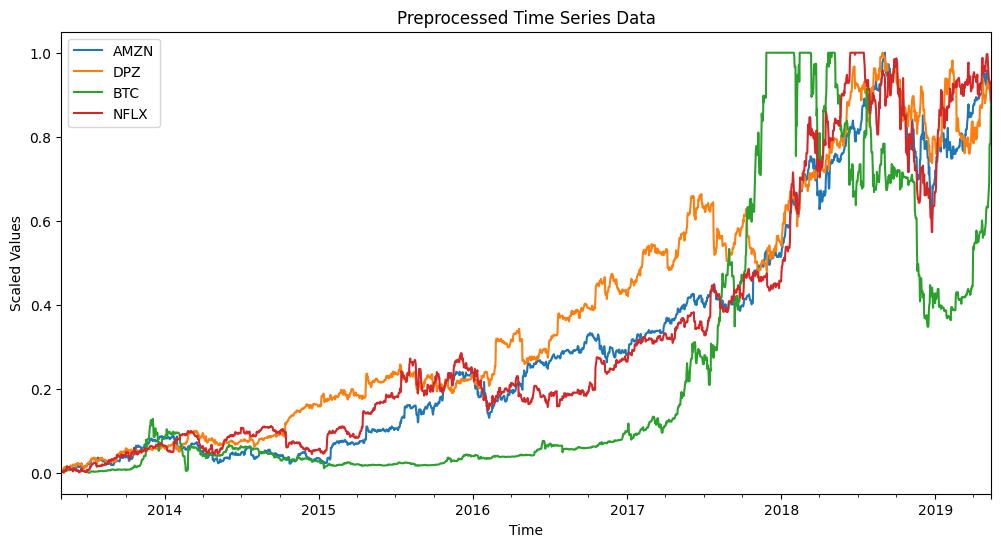

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
file_path = 'portfolio_data.csv'
df = pd.read_csv(file_path)

# Display basic information and check for missing values
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

# Print original data
print("\nOriginal Data:")
print(df.head())

# Convert time column to datetime format (assuming first column is time)
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
df = df.set_index(df.columns[0])  # Set time column as index

# Handle missing values - Forward and Backward Fill
if df.isnull().values.any():
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

# Resample data to a uniform interval (e.g., daily)
df_resampled = df.resample('D').mean()

# Handle outliers using IQR method
Q1 = df_resampled.quantile(0.25)
Q3 = df_resampled.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_resampled.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Fill any remaining NaN values after resampling
df_cleaned.fillna(method='ffill', inplace=True)
df_cleaned.fillna(method='bfill', inplace=True)

# Normalize or Standardize the data
scaler = MinMaxScaler()  # or StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns, index=df_cleaned.index)

# Print preprocessed data
print("\nPreprocessed Data:")
print(df_scaled.head())

# Plot the cleaned and scaled time series data
df_scaled.plot(figsize=(12, 6))
plt.title("Preprocessed Time Series Data")
plt.xlabel("Time")
plt.ylabel("Scaled Values")
plt.show()

